In [1311]:
#Aneeka Latif
#Lab 3


#import packages
import pandas as pd 
import numpy as np 
import re
from scipy.stats import uniform 
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.formula.api as smf  
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from sklearn import metrics
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [1312]:
#import the data
#set this to a base object
coaches = pd.read_csv("coaches9.csv")

#print the data

print(pd.DataFrame.head(coaches))

#print(coaches)

#look at the data
#coaches.describe()


                  School Conference              Coach    SchoolPay  \
0              Air Force   Mt. West       Troy Calhoun       885000   
1                  Akron        MAC       Terry Bowden    $411,000    
2                Alabama        SEC         Nick Saban  $8,307,000    
3  Alabama at Birmingham      C-USA         Bill Clark    $900,000    
4      Appalachian State   Sun Belt  Scott Satterfield    $712,500    

      TotalPay        Bonus  BonusPaid AssistantPay        Buyout  
0       885000       247000         --          $0             --  
1    $412,500     $225,000    $50,000           $0      $688,500   
2  $8,307,000   $1,100,000   $500,000           $0   $33,600,000   
3    $900,000     $950,000   $165,471           $0    $3,847,500   
4    $712,500     $295,000   $145,000           $0    $2,160,417   


In [1313]:
#get more data, add the stadium capacity, college, conference, and date opened 
#use https://www.collegegridirons.com/comparisons-by-capacity/ for the data
#use https://www.datacamp.com/community/tutorials/web-scraping-using-python as a template for scraping data 

#get url 
url = 'https://www.collegegridirons.com/comparisons-by-capacity/'
html = urlopen(url)

#put in beautiful soup object
soup = BeautifulSoup(html, 'lxml')


In [1314]:
#inspect webpage, see that intended data is in a 'tr' tag 
#get all tr tags, notice that the data prints each item by row then by column 
rows = soup.find_all('tr')

#sanity check 
#print(rows[:10])

In [1315]:
#still using https://www.datacamp.com/community/tutorials/web-scraping-using-python as a template

#for each row, get each block (td), then for each line w/ tags, use beautiful soup to clean the text 
row_td=[]
for row in rows:
    temp=row.find_all('td')
    row_td.append(BeautifulSoup(str(temp), "lxml").get_text())

#print(row_td)
#type(row_td) #make sure this is a list 

In [1316]:
capacity_data = pd.DataFrame(row_td)
#capacity_data

In [1317]:
#remove the first row
capacity_data=capacity_data[1:]


In [1318]:
#remove []
for i in range(1,len(capacity_data)):
    capacity_data[0][i]=capacity_data[0][i].replace('[', '')
    capacity_data[0][i]=capacity_data[0][i].replace(']', '')
#capacity_data[0][1].replace('[','')

In [1319]:
#split each string into columns on the comma, will need to join columns 3 and 4 later 
cap_split=[]
for i in range(1,len(capacity_data)):
    temp_split=capacity_data[0][i].split(',')
    cap_split.append(temp_split)

In [1320]:
#put in dataframe
cap_df = pd.DataFrame(cap_split)

In [1321]:
#combine col 3 and 4 to make capacity 
cap_df['Capacity']=(cap_df[3]+cap_df[4])

In [1322]:
#drop columns 3 and 4 
cap_df=cap_df.drop([3,4], axis='columns')

In [1323]:
#rename columns
cap_df=cap_df.rename(columns={0:'Stadium', 1:'College', 2:'Conference', 5:'Open_date'})
#cap_df

In [1324]:
#sort the colleges in asc order
cap_df=cap_df.sort_values('College')

In [1325]:
#use https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha
#trim whitespace from dataframe, not matching college/schools 
cap_df = cap_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [1326]:
#join dataframes on college and school
joined=pd.merge(cap_df, coaches, how='outer', left_on='College', right_on='School')

In [1327]:
#resolve nonmatching rows
joined.loc[joined['College'] != joined['School']]


,Stadium,College,Conference_x,Open_date,Capacity,School,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
10,LaVell Edwards Stadium,BYU,Independent,1965,63725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Kibbie Dome,Idaho,Sun Belt,1975,16000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Hard Rock Stadium,Miami,ACC,1987,65236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Yager Stadium,Miami-OH,MAC,1983,24286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Carter Finley Stadium,NC State,ACC,1966,57583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Gerald Ford Stadium,SMU,AAC,2000,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Roberts Stadium,Southern Miss,CUSA,1932,36000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Amon Carter Stadium,TCU,Big 12,1929,45000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Lincoln Financial Field,Temple,AAC,2003,68532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Legion Field,UAB,CUSA,1927,71594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1328]:
#rename some of the schools to match 
cap_df.loc[cap_df['College']=="BYU",'College']="Brigham Young"
cap_df.loc[cap_df['College']=="Miami-OH",'College']="Miami (Ohio)"
cap_df.loc[cap_df['College']=="Miami",'College']="Miami (Fla.)"
cap_df.loc[cap_df['College']=="NC State",'College']="North Carolina State"
cap_df.loc[cap_df['College']=="SMU",'College']="Southern Methodist"
cap_df.loc[cap_df['College']=="Southern Miss",'College']="Southern Mississippi"
cap_df.loc[cap_df['College']=="TCU",'College']="Texas Christian"
cap_df.loc[cap_df['College']=="UAB",'College']="Alabama at Birmingham"
cap_df.loc[cap_df['College']=="UMass",'College']="Massachusetts"
cap_df.loc[cap_df['College']=="UNC Charlotte",'College']="Charlotte"
cap_df.loc[cap_df['College']=="UNLV",'College']="Nevada-Las Vegas"
cap_df.loc[cap_df['College']=="USC",'College']="Southern California"
cap_df.loc[cap_df['College']=="UTEP",'College']="Texas-El Paso"
cap_df.loc[cap_df['College']=="UTSA",'College']="Texas-San Antonio"





In [1329]:
#join cleaned dataframes on college and school
joined=pd.merge(cap_df, coaches, how='right', left_on='College', right_on='School')
#drop redundant columns 
joined=joined.drop(['School', 'Conference_x'], axis='columns')
joined

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Falcon Stadium,Air Force,1962,52237,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,InfoCision Stadium,Akron,2009,30000,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Bryant Denny Stadium,Alabama,1929,101821,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Kidd Brewer Stadium,Appalachian State,1962,24150,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
4,Arizona Stadium,Arizona,1928,56037,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000"
5,Sun Devil Stadium,Arizona State,1958,56232,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667"
6,Razorback Stadium,Arkansas,1938,72000,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000"
7,Centennial Bank Stadium,Arkansas State,2002,30964,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--
9,Jordan Hare Stadium,Auburn,1939,87451,SEC,Gus Malzahn,"$6,700,000","$6,705,656","$1,400,000","$375,000",$0,"$32,143,750"


In [1330]:
#add more data
#add win rate
#downloaded data as an excel file from: http://stats.ncaa.org/rankings/change_sport_year_div

### @@ parameters for search 
#Sport == Football
#league = FCS
#year = 2015-2016 
#1/09/2016 final statistics 
#team tab
#winning percentage 

winrate_data = pd.read_excel("NCAA Statistics.xlsx")

#print the data

print(pd.DataFrame.head(winrate_data))


   Rank                        Team   W  L  T    Pct
0    55   Air Force (Mountain West)   8  6  0  0.571
1    42                 Akron (MAC)   8  5  0  0.615
2     1               Alabama (SEC)  14  1  0  0.933
3     9  Appalachian St. (Sun Belt)  11  2  0  0.846
4    71        Arizona St. (Pac-12)   6  7  0  0.462


In [1331]:
#a new list for storing split data, split the team on the () to remove committee
clean_split=[]
for i in range(0,len(winrate_data)):
    clean_split.append(winrate_data['Team'][i].split(' ('))
clean_split

#a new list for storing cleaned data, save only the first element, the school, and replace existing school name 
clean_schools = []
for i in range(0,len(clean_split)):
    clean_schools.append(clean_split[i][0])
    
winrate_data['Team']=clean_schools

#trim whitespace from dataframe, not matching college/schools 
winrate_data = winrate_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#change st to state
for i in range(1,len(winrate_data)):
    winrate_data['Team'][i]=winrate_data['Team'][i].replace('St.', 'State')


/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1332]:
#try to join the joined table on team name 
temp_join=pd.merge(joined, winrate_data, how='outer', left_on='College', right_on='Team')
temp_join

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,Team,W,L,T,Pct
0,Falcon Stadium,Air Force,1962,52237,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,55.0,Air Force,8.0,6.0,0.0,0.571
1,InfoCision Stadium,Akron,2009,30000,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",42.0,Akron,8.0,5.0,0.0,0.615
2,Bryant Denny Stadium,Alabama,1929,101821,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",1.0,Alabama,14.0,1.0,0.0,0.933
3,Kidd Brewer Stadium,Appalachian State,1962,24150,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",9.0,Appalachian State,11.0,2.0,0.0,0.846
4,Arizona Stadium,Arizona,1928,56037,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",58.0,Arizona,7.0,6.0,0.0,0.538
5,Sun Devil Stadium,Arizona State,1958,56232,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",71.0,Arizona State,6.0,7.0,0.0,0.462
6,Razorback Stadium,Arkansas,1938,72000,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",42.0,Arkansas,8.0,5.0,0.0,0.615
7,Centennial Bank Stadium,Arkansas State,2002,30964,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000",31.0,Arkansas State,9.0,4.0,0.0,0.692
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--,NaN,NaN,NaN,NaN,NaN,NaN
9,Jordan Hare Stadium,Auburn,1939,87451,SEC,Gus Malzahn,"$6,700,000","$6,705,656","$1,400,000","$375,000",$0,"$32,143,750",58.0,Auburn,7.0,6.0,0.0,0.538


In [1333]:
temp_join.loc[temp_join['College'] != temp_join['Team']]

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,Team,W,L,T,Pct
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--,NaN,NaN,NaN,NaN,NaN,NaN
10,LaVell Edwards Stadium,Brigham Young,1965,63725,Ind.,Kalani Sitake,--,--,--,--,$0,--,NaN,NaN,NaN,NaN,NaN,NaN
18,Bright House Networks Stadium,Central Florida,2007,45323,AAC,Josh Heupel,"$1,700,000","$1,700,000","$250,000",--,$0,"$3,587,500",NaN,NaN,NaN,NaN,NaN,NaN
19,Kelly Shorts Stadium,Central Michigan,1972,30255,MAC,John Bonamego,"$655,000","$655,000","$415,000","$45,000",$0,"$1,125,000",NaN,NaN,NaN,NaN,NaN,NaN
24,Rentschler Field,Connecticut,2003,40000,AAC,Randy Edsall,"$1,100,000","$1,100,000","$650,000","$129,000",$0,"$1,000,000",NaN,NaN,NaN,NaN,NaN,NaN
27,Rynearson Stadium,Eastern Michigan,1969,30200,MAC,Chris Creighton,"$460,000","$460,000","$395,000","$10,000",$0,"$950,000",NaN,NaN,NaN,NaN,NaN,NaN
29,FAU Stadium,Florida Atlantic,2011,30000,C-USA,Lane Kiffin,"$1,000,000","$1,000,000","$1,150,000","$40,000",$0,"$2,850,000",NaN,NaN,NaN,NaN,NaN,NaN
30,FIU Stadium,Florida International,1995,23500,C-USA,Butch Davis,"$945,000","$945,000","$550,000","$35,000",$0,"$3,185,626",NaN,NaN,NaN,NaN,NaN,NaN
34,Paulson Stadium,Georgia Southern,1984,24300,Sun Belt,Chad Lunsford,"$650,000","$650,000","$295,000",--,$0,"$83,333",NaN,NaN,NaN,NaN,NaN,NaN
49,Cajun Field,Louisiana-Lafayette,1971,31000,Sun Belt,Billy Napier,"$850,000","$850,000","$435,000",--,$0,"$2,671,875",NaN,NaN,NaN,NaN,NaN,NaN


In [1334]:
#rename some of the schools to match so we can then rejoin the table 
winrate_data.loc[winrate_data['Team']=="BYU","Team"]="Brigham Young"
winrate_data.loc[winrate_data['Team']=="Army West Point","Team"]="Army"
winrate_data.loc[winrate_data['Team']=="Central Mich.","Team"]="Central Michigan"
winrate_data.loc[winrate_data['Team']=="Eastern Mich.","Team"]="Eastern Michigan"
winrate_data.loc[winrate_data['Team']=="FIU","Team"]="Florida International"
winrate_data.loc[winrate_data['Team']=="Fla. Atlantic","Team"]="Florida Atlantic"
winrate_data.loc[winrate_data['Team']=="Ga. Southern","Team"]="Georgia Southern"
winrate_data.loc[winrate_data['Team']=="La.-Monroe","Team"]="Louisiana-Monroe"
winrate_data.loc[winrate_data['Team']=="Louisiana","Team"]="Louisiana-Lafayette"
winrate_data.loc[((winrate_data['Team'] =='Miami') & (winrate_data['Rank']==42.00)),'Team'] = 'Miami (Fla.)'
winrate_data.loc[((winrate_data['Team'] =='Miami') & (winrate_data['Rank']==100.00)),'Team'] = 'Miami (Ohio)'
winrate_data.loc[winrate_data['Team']=="Middle Tenn.","Team"]="Middle Tennessee"
winrate_data.loc[winrate_data['Team']=="Ole Miss","Team"]="Mississippi"
winrate_data.loc[winrate_data['Team']=="NC State","Team"]="North Carolina State"
winrate_data.loc[winrate_data['Team']=="Northern Ill.","Team"]="Northern Illinois"
winrate_data.loc[winrate_data['Team']=="SMU","Team"]="Southern Methodist"
winrate_data.loc[winrate_data['Team']=="South Fla.","Team"]="South Florida"
winrate_data.loc[winrate_data['Team']=="Southern Miss.","Team"]="Southern Mississippi"
winrate_data.loc[winrate_data['Team']=="TCU","Team"]="Texas Christian"
winrate_data.loc[winrate_data['Team']=="UCF","Team"]="Central Florida"
winrate_data.loc[winrate_data['Team']=="UConn","Team"]="Connecticut"
winrate_data.loc[winrate_data['Team']=="UNLV","Team"]="Nevada-Las Vegas"
winrate_data.loc[winrate_data['Team']=="UTEP","Team"]="Texas-El Paso"

winrate_data.loc[winrate_data['Team']=="UTSA","Team"]="Texas-San Antonio"
winrate_data.loc[winrate_data['Team']=="Western Ky.","Team"]="Western Kentucky"
winrate_data.loc[winrate_data['Team']=="Western Mich.","Team"]="Western Michigan"











In [1335]:
joined=pd.merge(joined, winrate_data, how='outer', left_on='College', right_on='Team')
#drop redundant columns 
joined=joined.drop(['Team'], axis='columns')
joined


,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,W,L,T,Pct
0,Falcon Stadium,Air Force,1962,52237,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,55.0,8.0,6.0,0.0,0.571
1,InfoCision Stadium,Akron,2009,30000,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",42.0,8.0,5.0,0.0,0.615
2,Bryant Denny Stadium,Alabama,1929,101821,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",1.0,14.0,1.0,0.0,0.933
3,Kidd Brewer Stadium,Appalachian State,1962,24150,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",9.0,11.0,2.0,0.0,0.846
4,Arizona Stadium,Arizona,1928,56037,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",58.0,7.0,6.0,0.0,0.538
5,Sun Devil Stadium,Arizona State,1958,56232,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",71.0,6.0,7.0,0.0,0.462
6,Razorback Stadium,Arkansas,1938,72000,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",42.0,8.0,5.0,0.0,0.615
7,Centennial Bank Stadium,Arkansas State,2002,30964,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000",31.0,9.0,4.0,0.0,0.692
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--,118.0,2.0,10.0,0.0,0.167
9,Jordan Hare Stadium,Auburn,1939,87451,SEC,Gus Malzahn,"$6,700,000","$6,705,656","$1,400,000","$375,000",$0,"$32,143,750",58.0,7.0,6.0,0.0,0.538


In [1336]:
#add more data, added the graduation rate 
#found data on : https://web3.ncaa.org/aprsearch/gsrsearch
# @@ with parameters set to Sport == Football, Year 2015-2016, All Conferences
#saved to a csv 

grad_data= pd.read_csv("grad_rate.csv", header=None)

In [1337]:
#columns we want to keep are 1:University, 5: GSR (graduation success rate), 6:FGR (federal graduation rate)
grad_data=grad_data[[1,5,6]]

In [1338]:
#rename cols
grad_data=grad_data.rename(columns={1:"School", 5:"GSR", 6:"FGR"})

In [1339]:
#isolate schools
#remove "University" and "of" 
grad_data['School']

for i in range(1,len(grad_data)):
    grad_data['School'][i]=grad_data['School'][i].replace('University', '')
    grad_data['School'][i]=grad_data['School'][i].replace('of ', '')

#trim whitespace from dataframe, not matching college/schools 
grad_data = grad_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [1340]:
#temporarily merge the tables
temp_join2=pd.merge(joined, grad_data, how='outer', left_on='College', right_on='School')
temp_join2

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,W,L,T,Pct,School,GSR,FGR
0,Falcon Stadium,Air Force,1962,52237,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,55.0,8.0,6.0,0.0,0.571,NaN,NaN,NaN
1,InfoCision Stadium,Akron,2009,30000,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",42.0,8.0,5.0,0.0,0.615,Akron,63.0,56.0
2,Bryant Denny Stadium,Alabama,1929,101821,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",1.0,14.0,1.0,0.0,0.933,Alabama,80.0,62.0
3,Kidd Brewer Stadium,Appalachian State,1962,24150,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",9.0,11.0,2.0,0.0,0.846,Appalachian State,83.0,80.0
4,Arizona Stadium,Arizona,1928,56037,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",58.0,7.0,6.0,0.0,0.538,Arizona,73.0,63.0
5,Sun Devil Stadium,Arizona State,1958,56232,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",71.0,6.0,7.0,0.0,0.462,Arizona State,80.0,70.0
6,Razorback Stadium,Arkansas,1938,72000,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",42.0,8.0,5.0,0.0,0.615,NaN,NaN,NaN
7,Centennial Bank Stadium,Arkansas State,2002,30964,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000",31.0,9.0,4.0,0.0,0.692,Arkansas State,71.0,60.0
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--,118.0,2.0,10.0,0.0,0.167,NaN,NaN,NaN
9,Jordan Hare Stadium,Auburn,1939,87451,SEC,Gus Malzahn,"$6,700,000","$6,705,656","$1,400,000","$375,000",$0,"$32,143,750",58.0,7.0,6.0,0.0,0.538,Auburn,69.0,61.0


In [1341]:
#compare the nonmatches and clean up
temp_join2.loc[temp_join2['College'] != temp_join2['School']]

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,W,L,T,Pct,School,GSR,FGR
0,Falcon Stadium,Air Force,1962,52237,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,55.0,8.0,6.0,0.0,0.571,NaN,NaN,NaN
6,Razorback Stadium,Arkansas,1938,72000,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",42.0,8.0,5.0,0.0,0.615,NaN,NaN,NaN
8,Michie Stadium,Army,1924,38000,Ind.,Jeff Monken,932521,932521,--,--,$0,--,118.0,2.0,10.0,0.0,0.167,NaN,NaN,NaN
15,Doyt Perry Stadium,Bowling Green,1966,23724,MAC,Mike Jinks,"$437,228","$437,228","$245,000","$81,250",$0,"$874,456",28.0,10.0,4.0,0.0,0.714,NaN,NaN,NaN
16,UB Stadium,Buffalo,1993,29013,MAC,Lance Leipold,"$455,500","$455,500","$381,000",$0,$0,"$1,020,833",81.0,5.0,7.0,0.0,0.417,NaN,NaN,NaN
17,Memorial Stadium,California,1923,62717,Pac-12,Justin Wilcox,"$1,500,000","$1,500,000","$900,000","$75,000",$0,"$7,208,500",42.0,8.0,5.0,0.0,0.615,NaN,NaN,NaN
22,Folsom Field,Colorado,1924,53750,Pac-12,Mike MacIntyre,"$2,878,500","$2,878,500","$2,150,000","$297,000",$0,"$10,314,583",99.0,4.0,9.0,0.0,0.308,NaN,NaN,NaN
32,Bulldog Stadium,Fresno State,1980,41031,Mt. West,Jeff Tedford,"$1,550,000","$1,550,000","$2,765,000","$1,240,000",$0,"$5,440,000",100.0,3.0,9.0,0.0,0.250,NaN,NaN,NaN
36,Bobby Dodd Stadium,Georgia Tech,1913,55000,ACC,Paul Johnson,"$3,060,018","$3,060,018","$1,330,000","$225,000",$0,"$4,000,000",100.0,3.0,9.0,0.0,0.250,NaN,NaN,NaN
37,Aloha Stadium,Hawaii,1975,50000,Mt. West,Nick Rolovich,"$425,004","$486,504","$1,260,000",$0,$0,"$300,000",117.0,3.0,10.0,0.0,0.231,NaN,NaN,NaN


In [1342]:
#rename some of the schools to match so we can then rejoin the table 
grad_data.loc[grad_data['School']=="U.S. Air Force Academy",'School']="Air Force"
grad_data.loc[grad_data['School']=="U.S. Military Academy",'School']="Army"
grad_data.loc[grad_data['School']=="Bowling Green State",'School']="Bowling Green"
grad_data.loc[grad_data['School']=="at Buffalo, the State  New York",'School']="Buffalo"
grad_data.loc[grad_data['School']=="California, Berkeley",'School']="California"
grad_data.loc[grad_data['School']=="California State , Fresno",'School']="Fresno State"
grad_data.loc[grad_data['School']=="Georgia Institute Technology",'School']="Georgia Tech" 
grad_data.loc[grad_data['School']=="Hawaii, Manoa",'School']="Hawaii"
grad_data.loc[grad_data['School']=="Illinois State",'School']="Illinois"
grad_data.loc[grad_data['School']=="Indiana State",'School']="Indiana"
grad_data.loc[grad_data['School']=="Louisiana State",'School']="LSU"
grad_data.loc[grad_data['School']=="Louisiana at Lafayette",'School']="Louisiana-Lafayette"
grad_data.loc[grad_data['School']=="Louisiana Monroe",'School']="Louisiana-Monroe"
grad_data.loc[grad_data['School']=="Maryland, College Park",'School']="Maryland"
grad_data.loc[grad_data['School']=="Minnesota, Twin Cities",'School']="Minnesota"
grad_data.loc[grad_data['School']=="Miami (Florida)",'School']="Miami (Fla.)"
grad_data.loc[grad_data['School']=="Miami  (Ohio)",'School']="Miami (Ohio)"
grad_data.loc[grad_data['School']=="Middle Tennessee State",'School']="Middle Tennessee"
grad_data.loc[grad_data['School']=="Missouri State",'School']="Missouri"
grad_data.loc[grad_data['School']=="U.S. Naval Academy",'School']="Navy"
grad_data.loc[grad_data['School']=="Nebraska, Lincoln",'School']="Nebraska"
grad_data.loc[grad_data['School']=="Nevada, Reno",'School']="Nevada"
grad_data.loc[grad_data['School']=="The Ohio State",'School']="Ohio State"
grad_data.loc[grad_data['School']=="Rutgers, The State  New Jersey, New Brunswick",'School']="Rutgers"
grad_data.loc[grad_data['School']=="Pennsylvania State",'School']="Penn State"
grad_data.loc[grad_data['School']=="South Carolina State",'School']="South Carolina"
grad_data.loc[grad_data['School']=="Arkansas, Fayetteville",'School']="Arkansas"
grad_data.loc[grad_data['School']=="Colorado, Boulder",'School']="Colorado"
#grad_data.loc[grad_data['School']=="North Carolina State",'School']="North Carolina"
grad_data.loc[grad_data['School']=="The  Southern Mississippi",'School']="Southern Mississippi"
grad_data.loc[grad_data['School']=="Tennessee, Knoxville",'School']="Tennessee"
grad_data.loc[grad_data['School']=="Texas at Austin",'School']="Texas"
grad_data.loc[grad_data['School']=="The  Tulsa",'School']="Tulsa"
grad_data.loc[grad_data['School']=="California, Los Angeles",'School']="UCLA"
grad_data.loc[grad_data['School']=="Massachusetts, Amherst",'School']="Massachusetts"
grad_data.loc[grad_data['School']=="Nevada, Las Vegas",'School']="Nevada-Las Vegas"
grad_data.loc[grad_data['School']=="Texas A&M , College Station",'School']="Texas A&M"
grad_data.loc[grad_data['School']=="Texas at El Paso",'School']="Texas-El Paso"
grad_data.loc[grad_data['School']=="Texas at San Antonio",'School']="Texas-San Antonio"
grad_data.loc[grad_data['School']=="Massachusetts, Amherst",'School']="Umass"
grad_data.loc[grad_data['School']=="Virginia Polytechnic Institute and State",'School']="Virginia Tech"
grad_data.loc[grad_data['School']=="Wisconsin-Madison",'School']="Wisconsin"



#remove remaining empty rows 






In [1343]:
#take the inverse of the table, save only the corrected colleges to the dataframe
joined = temp_join2.loc[-(temp_join2['College'].isnull() &temp_join2['Coach'].isnull())]
#remove redundant column
joined=joined.drop(['School'], axis='columns')

In [1344]:
#clean up some rows 
joined.loc[[127],['College']]='Coastal Carolina'
joined.loc[[127],['Stadium']]='Kenan Memorial Stadium'
joined.loc[[127],['Capacity']]='51000'
joined.loc[[127],['Open_date']]='1927'

joined.loc[[128],['College']]='Liberty'
joined.loc[[128],['Stadium']]='Williams Stadium'
joined.loc[[128],['Capacity']]='8085'
joined.loc[[128],['Open_date']]='1989'

In [1345]:
#for everthing that is NAN, compute the average

#look at the data 
joined.describe(include='all')

#using https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null as a template to find null rows
null_columns=joined.columns[joined.isnull().any()]

(joined[joined["TotalPay"].isnull()][null_columns])

#there are null values, for all null values use an average value 
joined['Rank']=joined['Rank'].fillna(round(joined['Rank'].mean(),2))
joined['W']=joined['W'].fillna(round(joined['W'].mean(),2))
joined['L']=joined['L'].fillna(round(joined['L'].mean(),2))
joined['T']=joined['T'].fillna(round(joined['T'].mean(),2))
joined['Pct']=joined['Pct'].fillna(round(joined['Pct'].mean(),4))
joined['GSR']=joined['GSR'].fillna(round(joined['GSR'].mean(),2))
joined['FGR']=joined['FGR'].fillna(round(joined['FGR'].mean(),2))

#remove $ and , from pay 



In [1346]:
#having issues with -- characters
joined.loc[joined['TotalPay']=="--"]

#was having a hard time with replacing $, "df.replace" was not working
#used this: https://www.reddit.com/r/learnpython/comments/3yviy7/pandas_replace_not_working/ as a template 
joined = joined.replace( '[\$,)]','', regex=True )

#first convert those rows to NaNs 
joined['TotalPay'][10]=np.nan
joined['TotalPay'][12]=np.nan
joined['TotalPay'][85]=np.nan
joined['TotalPay'][87]=np.nan

#then convert this to numeric
joined['TotalPay']=pd.to_numeric(joined['TotalPay'])

#then fill in the missing values with means 
joined['TotalPay']=joined['TotalPay'].fillna(round(joined['TotalPay'].mean(),2))

#convert other variables to numeric 
joined['Capacity']=pd.to_numeric(joined['Capacity'])
joined['Open_date']=pd.to_numeric(joined['Open_date'])

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by Inte

In [1347]:
#drop Tie data (whether teams have tied) because it's not useful information 
joined=joined.drop('T', axis=1)

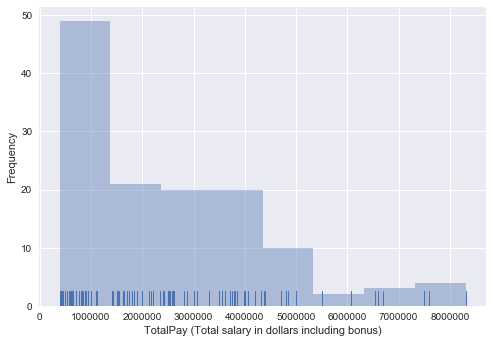

In [1348]:
#what schools have coaches with the highest pay?
joined.sort_values(['TotalPay'], ascending=False)

#looking at the totalpay, the schools with the highest totalpay, appear to have lower ranks
#the highest 3 paid coaches are ranked 123, (not available), and 42 

sns.distplot(joined['TotalPay'], kde=False, rug=True)
plt.xlabel("TotalPay (Total salary in dollars including bonus)")
plt.ylabel("Frequency")
plt.show()

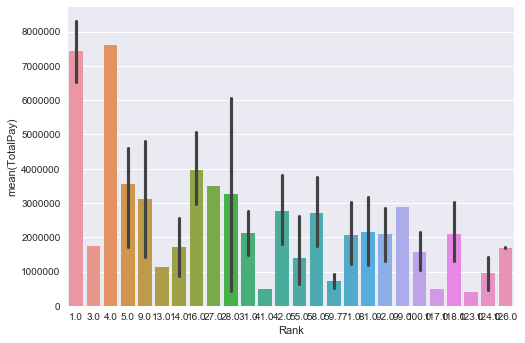

In [1349]:
#plot rank and pay 
sns.barplot(y="TotalPay", x="Rank", data=joined)
plt.show()


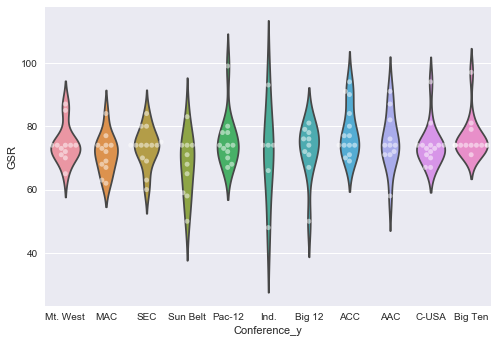

In [1350]:
sns.violinplot(x="Conference_y", y="GSR", data=joined, inner=None)
sns.swarmplot(x="Conference_y", y="GSR", data=joined,color="w", alpha=.5)
plt.show()

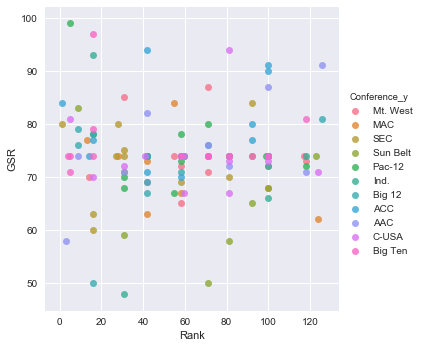

In [1351]:
sns.lmplot(x="Rank", y="GSR",data=joined, hue="Conference_y", fit_reg=False)
plt.show()

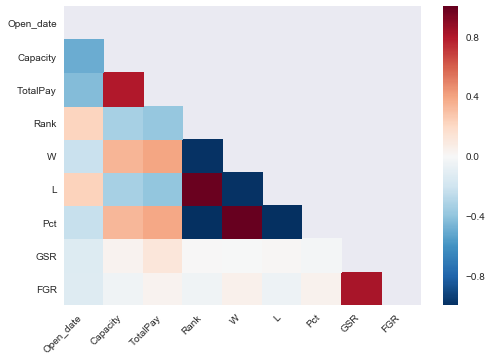

In [1352]:

#create a heatmap 
corr = joined.corr()

#mask the righthand side bc redundant (from asynch materials: Model Review - Consumer)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [1353]:
# split data into training and test sets
#using Miller ch 2 as template 
np.random.seed(336)
joined['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(joined))
joined_train = joined[joined['runiform'] >= 0.33]
joined_test = joined[joined['runiform'] < 0.33]


# check training data frame
print('\njoined_train data frame (rows, columns): ',joined_train.shape)
print(joined_train.head())
# check test data frame
print('\joined_test data frame (rows, columns): ',joined_test.shape)
print(joined_test.head())

# generate model for Totalpay

my_model = str('TotalPay ~ Rank +GSR + Conference_y +Pct+Capacity')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = joined_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
joined_train['predict_totalpay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
joined_test['predict_totalpay'] = train_model_fit.predict(joined_test)

  


joined_train data frame (rows, columns):  (88, 19)
                Stadium        College  Open_date  Capacity Conference_y  \
0        Falcon Stadium      Air Force       1962     52237     Mt. West   
1    InfoCision Stadium          Akron       2009     30000          MAC   
2  Bryant Denny Stadium        Alabama       1929    101821          SEC   
4       Arizona Stadium        Arizona       1928     56037       Pac-12   
5     Sun Devil Stadium  Arizona State       1958     56232       Pac-12   

          Coach SchoolPay   TotalPay     Bonus BonusPaid AssistantPay  \
0  Troy Calhoun    885000   885000.0    247000        --           0    
1  Terry Bowden   411000    412500.0   225000     50000            0    
2    Nick Saban  8307000   8307000.0  1100000    500000            0    
4  Kevin Sumlin  1600000   2000000.0  2025000         --           0    
5  Herm Edwards  2000000   2000000.0  3010000         --           0    

      Buyout  Rank     W    L    Pct   GSR    FGR  r

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1354]:
#what's the predicted salary for syracuse 
joined_train.loc[joined_train['College']=='Syracuse']['predict_totalpay']

95    2.977502e+06
Name: predict_totalpay, dtype: float64

In [1355]:
#what was the actual salary? 
joined.loc[joined['College']=='Syracuse']['TotalPay']

95    2401206.0
Name: TotalPay, dtype: float64

In [1356]:
#what if syracuse was in big 10? 
joined.loc[joined['College']=='Syracuse']
test_syr = joined.loc[joined['College']=='Syracuse']
test_syr['Conference_y']='Big Ten'
y_pred = train_model_fit.predict(test_syr)
y_pred

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


95    3.298668e+06
dtype: float64

In [1357]:
#what if syracuse was in big east (also known as ACC)? 
joined.loc[joined['College']=='Syracuse']
test_syr = joined.loc[joined['College']=='Syracuse']
test_syr['Conference_y']='ACC'
y_pred = train_model_fit.predict(test_syr)
y_pred

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


95    2.977502e+06
dtype: float64

In [1358]:
#what if grad rate was lower? 
joined.loc[joined['College']=='Syracuse']
test_syrgsr = joined.loc[joined['College']=='Syracuse']
test_syrgsr['GSR']=63
y_pred = train_model_fit.predict(test_syrgsr)
y_pred

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


95    2.754747e+06
dtype: float64

In [1359]:
#higher? 
joined.loc[joined['College']=='Syracuse']
test_sygsr = joined.loc[joined['College']=='Syracuse']
test_syrgsr['GSR']=92
y_pred = train_model_fit.predict(test_syrgsr)
y_pred

/Users/aneekalatif/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


95    3.134742e+06
dtype: float64

In [1360]:
#calculate root mean squared error for accuracy
#find the predicted Total pay - actual total pay 
y_predicted = train_model_fit.predict(joined)
rmse=np.sqrt(mean_squared_error(joined['TotalPay'],y_predicted))

In [1361]:
#calc root mean squared error / mean to see it's percent of the average 
rmse/(joined['TotalPay']).mean()

0.36198288659864464

In [1362]:
#joined.loc[joined['Pct']=='SEC']

joined.sort_values('Pct', ascending=False)

,Stadium,College,Open_date,Capacity,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,W,L,Pct,GSR,FGR,runiform
21,Memorial Stadium,Clemson,1942,81500,ACC,Dabo Swinney,6205000,6543350.00,1125000,500000,0,35000000,1.0,14.0,1.0,0.933,84.0,79.00,0.765783
2,Bryant Denny Stadium,Alabama,1929,101821,SEC,Nick Saban,8307000,8307000.00,1100000,500000,0,33600000,1.0,14.0,1.0,0.933,80.0,62.00,0.482668
38,TDECU Stadium,Houston,2014,40000,AAC,Major Applewhite,1750000,1750000.00,782500,20000,0,2112500,3.0,13.0,1.0,0.929,58.0,51.00,0.750499
76,Ohio Stadium,Ohio State,1922,104944,Big Ten,Urban Meyer,7600000,7600000.00,775000,350000,0,38058402,4.0,12.0,1.0,0.923,74.0,61.71,0.090317
58,Spartan Stadium,Michigan State,1923,75005,Big Ten,Mark Dantonio,4390417,4390417.00,650000,125000,0,7000000,5.0,12.0,2.0,0.857,71.0,50.00,0.675627
94,Stanford Stadium,Stanford,1921,50000,Pac-12,David Shaw,4311543,4311543.00,--,--,0,--,5.0,12.0,2.0,0.857,99.0,92.00,0.801106
123,LT Smith Stadium,Western Kentucky,1968,22113,C-USA,Mike Sanford Jr.,800000,805850.00,400000,0,0,1200000,5.0,12.0,2.0,0.857,81.0,68.00,0.371507
41,Kinnick Stadium,Iowa,1929,70585,Big Ten,Kirk Ferentz,4700000,4700000.00,2875000,600000,0,22396250,5.0,12.0,2.0,0.857,74.0,59.00,0.631374
3,Kidd Brewer Stadium,Appalachian State,1962,24150,Sun Belt,Scott Satterfield,712500,712500.00,295000,145000,0,2160417,9.0,11.0,2.0,0.846,83.0,80.00,0.230380
65,Memorial Stadium,Navy,1959,34000,AAC,Ken Niumatalolo,2163000,2163000.00,--,--,0,--,9.0,11.0,2.0,0.846,74.0,61.71,0.470182
